In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [29]:
arquivo = open("./SalaryPrediction.csv", "r", encoding="utf-8")
arquivo

<_io.TextIOWrapper name='./SalaryPrediction.csv' mode='r' encoding='utf-8'>

In [30]:
x = []
y = [] 

In [31]:
texto = " "
contador = 0
while texto != '':
    texto = arquivo.readline()
    if contador > 0 and texto != '':
        valores = texto.split(",")
        x.append( float(valores[0]) )
        y.append( float(valores[1]) )
        # print(f"Anos experiencia: {valores[0]}\tSalario: {valores[1]}")
    contador += 1

In [33]:
arquivo.close()

In [39]:
x = np.array(x)

In [41]:
y = np.array(y)

In [44]:
def equacao_linear(x, w, b):
    return (x * w) + b

In [61]:
w = 1000
b = 2
learn_rate = 0.01

In [52]:
y_hat = equacao_linear(x, w, b)
y_hat

array([ 1102.,  1202.,  1302.,  1502.,  2002.,  2202.,  2502.,  2902.,
        3002.,  3202.,  3202.,  3502.,  3702.,  3802.,  3902.,  4002.,
        4002.,  4102.,  4302.,  4502.,  4702.,  4902.,  5102.,  5302.,
        5502.,  5902.,  6002.,  6202.,  6502.,  6802.,  7102.,  7902.,
        8202.,  8502.,  8702.,  9002.,  9502.,  9602., 10302., 10502.])

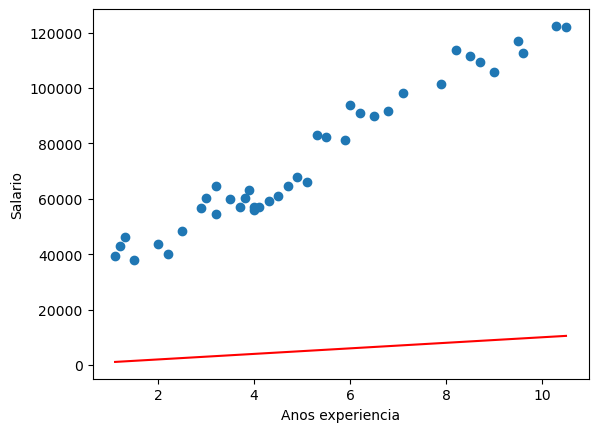

In [53]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.xlabel("Anos experiencia")
plt.ylabel("Salario")
plt.show()

In [57]:
def calcular_custo(y_hat, y):
    return (y_hat - y)

In [58]:
def funcao_custo(y_hat, y):
    m = len(y_hat)
    custo = calcular_custo(y_hat, y) ** 2
    return (np.sum(custo) / (2 * m))
    

In [59]:
def novo_w(w, x, y_hat, y, learn_rate):
    m = len(x)
    custo = calcular_custo(y_hat, y) * x
    dw = np.sum(custo) / m
    return (w - learn_rate * dw)

In [66]:
def novo_b(b, x, y_hat, y, learn_rate):
    m=len(x)
    custo = calcular_custo(y_hat, y)
    db = np.sum(custo) / m
    return (b - learn_rate * db)

In [99]:
w = 10
b = 20
learn_rate = 0.05

In [104]:
for _ in range(90):
    y_hat = equacao_linear(x, w, b)
    custo = funcao_custo(y_hat, y)
    # print(f"W:{w}, B:{b}, Custo:{custo}")
    w = novo_w(w, x, y_hat, y, learn_rate)
    b = novo_b(b, x, y_hat, y, learn_rate)
    # print(f"W Novo :{w}")

In [105]:
print(f"W:{w}, B:{b}, Custo:{custo}")

W:10961.753234567812, B:16388.677760568742, Custo:23573447.247282553


In [106]:
# Custo 1: 3118660839.7149997
# Custo 2: 2687108529.4875
# Custo 3: 1401054443.8711083
# Custo 4:   74861300
# Custo 5:   14480522.29893288
# Custo 6:   14480191.826
# Custo 7:   14480191.82

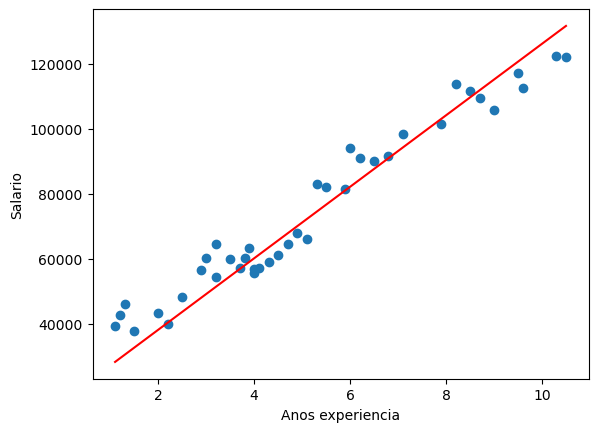

In [107]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.xlabel("Anos experiencia")
plt.ylabel("Salario")
plt.show()